<a href="https://colab.research.google.com/github/roshan1960701/Machine-Learning/blob/main/ML_Assessment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as npy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # imblearn library can be installed using pip install imblearn
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
adultDataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/adult.csv')
pd.set_option('display.max_columns', None)
print(adultDataset.head())
# print(adultDataset.shape)
# print(adultDataset.info())
# print(adultDataset.describe())


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

fnlwgt = Final weight

## Replacing Missing Values in Dataset with NaN values 


In [ ]:
adultDataset.replace("?", npy.nan, inplace = True)
print(adultDataset.head())
print(adultDataset.shape)

   age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

## 3 Columns have Nan values such as Occupation, workclass and native.country
- Simply will drop those records from the datasets


In [ ]:
NewadultDataset=adultDataset.dropna() # droping the NA records from dataset
NewadultDataset.shape

(30162, 15)

In [ ]:
print(len(Counter(NewadultDataset['income'])))
dataMap = {}
for i,j in zip(Counter(NewadultDataset['income']),range(len(Counter(NewadultDataset['income'])))):
  dataMap[i] = j
print(dataMap)  


2
{'<=50K': 0, '>50K': 1}


In [ ]:
print(Counter(NewadultDataset['workclass']))
print(Counter(NewadultDataset['education']))
print(Counter(NewadultDataset['marital.status']))
print(Counter(NewadultDataset['occupation']))
print(Counter(NewadultDataset['relationship']))
print(Counter(NewadultDataset['race']))
print(Counter(NewadultDataset['sex']))
print(Counter(NewadultDataset['native.country']))
print(Counter(NewadultDataset['income']))

# def converter(column):   convert all value in dict function
#     sampleDict = {}
#     for i,j in zip(column,range(len(column))):
#         sampleDict[i] = j
#     return sampleDict


NewadultDataset['workclass'] = NewadultDataset['workclass'].map({'Private': 0, 'State-gov': 1, 'Federal-gov': 2, 'Self-emp-not-inc': 3, 'Self-emp-inc': 4, 'Local-gov': 5, 'Without-pay': 6})
NewadultDataset['education'] = NewadultDataset['education'].map({'HS-grad': 0, '7th-8th': 1, 'Some-college': 2, '10th': 3, 'Doctorate': 4, 'Prof-school': 5, 'Bachelors': 6, 'Masters': 7, '11th': 8, 'Assoc-voc': 9, '1st-4th': 10, '5th-6th': 11, 'Assoc-acdm': 12, '12th': 13, '9th': 14, 'Preschool': 15})
NewadultDataset['marital.status'] = NewadultDataset['marital.status'].map({'Widowed': 0, 'Divorced': 1, 'Separated': 2, 'Never-married': 3, 'Married-civ-spouse': 4, 'Married-spouse-absent': 5, 'Married-AF-spouse': 6})
NewadultDataset['occupation'] = NewadultDataset['occupation'].map({'Exec-managerial': 0, 'Machine-op-inspct': 1, 'Prof-specialty': 2, 'Other-service': 3, 'Adm-clerical': 4, 'Transport-moving': 5, 'Sales': 6, 'Craft-repair': 7, 'Farming-fishing': 8, 'Tech-support': 9, 'Protective-serv': 10, 'Handlers-cleaners': 11, 'Armed-Forces': 12, 'Priv-house-serv': 13})
NewadultDataset['relationship'] = NewadultDataset['relationship'].map({'Not-in-family': 0, 'Unmarried': 1, 'Own-child': 2, 'Other-relative': 3, 'Husband': 4, 'Wife': 5})
NewadultDataset['race'] = NewadultDataset['race'].map({'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2, 'Other': 3, 'Amer-Indian-Eskimo': 4})
NewadultDataset['sex'] = NewadultDataset['sex'].map({'Female': 0, 'Male': 1})
NewadultDataset['native.country'] = NewadultDataset['native.country'].map({'United-States': 0, 'Mexico': 1, 'Greece': 2, 'Vietnam': 3, 'China': 4, 'Taiwan': 5, 'India': 6, 'Philippines': 7, 'Trinadad&Tobago': 8, 'Canada': 9, 'South': 10, 'Holand-Netherlands': 11, 'Puerto-Rico': 12, 'Poland': 13, 'Iran': 14, 'England': 15, 'Germany': 16, 'Italy': 17, 'Japan': 18, 'Hong': 19, 'Honduras': 20, 'Cuba': 21, 'Ireland': 22, 'Cambodia': 23, 'Peru': 24, 'Nicaragua': 25, 'Dominican-Republic': 26, 'Haiti': 27, 'Hungary': 28, 'Columbia': 29, 'Guatemala': 30, 'El-Salvador': 31, 'Jamaica': 32, 'Ecuador': 33, 'France': 34, 'Yugoslavia': 35, 'Portugal': 36, 'Laos': 37, 'Thailand': 38, 'Outlying-US(Guam-USVI-etc)': 39, 'Scotland': 40})
NewadultDataset['income'] = NewadultDataset['income'].map({'<=50K': 0, '>50K': 1})


Counter({'Private': 22286, 'Self-emp-not-inc': 2499, 'Local-gov': 2067, 'State-gov': 1279, 'Self-emp-inc': 1074, 'Federal-gov': 943, 'Without-pay': 14})
Counter({'HS-grad': 9840, 'Some-college': 6678, 'Bachelors': 5044, 'Masters': 1627, 'Assoc-voc': 1307, '11th': 1048, 'Assoc-acdm': 1008, '10th': 820, '7th-8th': 557, 'Prof-school': 542, '9th': 455, '12th': 377, 'Doctorate': 375, '5th-6th': 288, '1st-4th': 151, 'Preschool': 45})
Counter({'Married-civ-spouse': 14065, 'Never-married': 9726, 'Divorced': 4214, 'Separated': 939, 'Widowed': 827, 'Married-spouse-absent': 370, 'Married-AF-spouse': 21})
Counter({'Prof-specialty': 4038, 'Craft-repair': 4030, 'Exec-managerial': 3992, 'Adm-clerical': 3721, 'Sales': 3584, 'Other-service': 3212, 'Machine-op-inspct': 1966, 'Transport-moving': 1572, 'Handlers-cleaners': 1350, 'Farming-fishing': 989, 'Tech-support': 912, 'Protective-serv': 644, 'Priv-house-serv': 143, 'Armed-Forces': 9})
Counter({'Husband': 12463, 'Not-in-family': 7726, 'Own-child': 446

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
total = adultDataset.isnull(). sum().sort_values(ascending=False)
percent = (adultDataset.isnull().sum()/adultDataset.isnull(). count()).sort_values(ascending=False)
missing_data = pd. concat([total, percent], axis=1, keys=['Total','Percent'])

# missing_data = pd. concat([occupation, workclass, native.country], axis=1, keys=['occupation',
# 'workclass','native.country'])

adultDataset.dropna(how='any')
adultDataset
# missing_data.head(20)

# adultDataset = adultDataset.drop(adultDataset.loc[adultDataset['header_name']. isnull()].index)


<bound method NDFrame.head of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married  

In [ ]:
corrs = NewadultDataset.corr()
corrs

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1.000000,0.200676,-0.076511,0.002057,0.043526,-0.053007,-0.087649,0.177160,-0.031913,0.081993,0.080154,0.060165,0.101599,-0.000926,0.241998
workclass,0.200676,1.000000,-0.039551,0.041215,0.145180,0.042811,-0.028491,0.092696,-0.009283,0.058091,0.051913,0.038237,0.102056,-0.030631,0.113564
fnlwgt,-0.076511,-0.039551,1.000000,0.016503,-0.044992,0.002947,0.026410,-0.022693,-0.008233,0.025362,0.000422,-0.009750,-0.022886,0.042786,-0.008957
education,0.002057,0.041215,0.016503,1.000000,0.208490,0.040332,-0.089528,-0.001918,0.003852,0.004248,0.032991,0.021640,0.003409,0.061028,0.103082
education.num,0.043526,0.145180,-0.044992,0.208490,1.000000,0.065387,-0.265897,0.026342,-0.040035,0.006157,0.124416,0.079646,0.152522,-0.070518,0.335286
marital.status,-0.053007,0.042811,0.002947,0.040332,0.065387,1.000000,0.028903,0.712072,-0.027590,0.413253,0.052517,0.049314,0.124033,0.019412,0.299080
occupation,-0.087649,-0.028491,0.026410,-0.089528,-0.265897,0.028903,1.000000,0.007548,-0.005837,0.147424,-0.060890,-0.036970,-0.042838,-0.002828,-0.154750
relationship,0.177160,0.092696,-0.022693,-0.001918,0.026342,0.712072,0.007548,1.000000,-0.045434,0.349642,0.066498,0.063504,0.119612,-0.003688,0.383194
race,-0.031913,-0.009283,-0.008233,0.003852,-0.040035,-0.027590,-0.005837,-0.045434,1.000000,-0.066721,-0.010851,-0.022339,-0.036800,0.150654,-0.066928
sex,0.081993,0.058091,0.025362,0.004248,0.006157,0.413253,0.147424,0.349642,-0.066721,1.000000,0.048814,0.047011,0.231268,-0.024618,0.216699


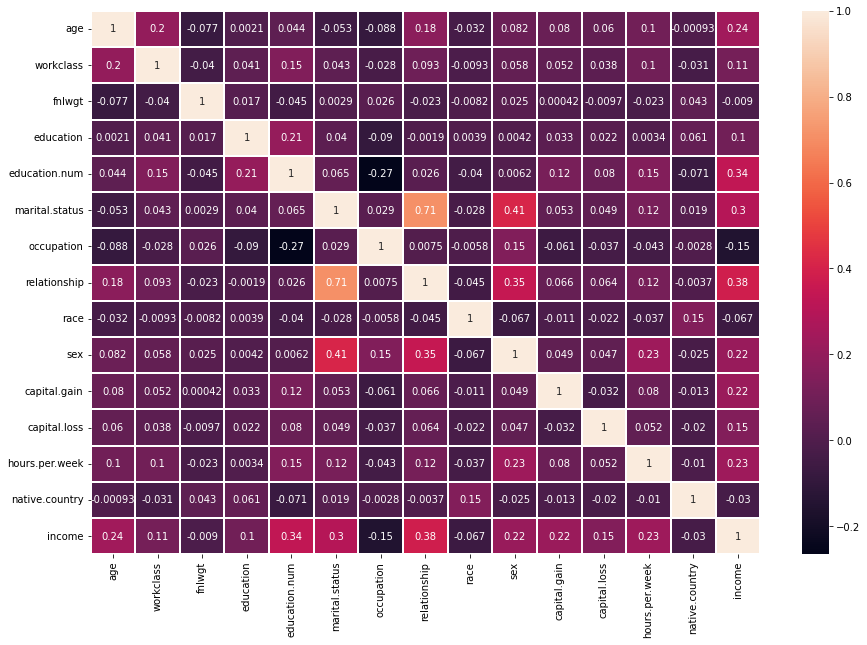

In [ ]:
plt.subplots(figsize=(15,10))
map1=sns.heatmap(corrs, annot=True, linewidth=1)#, cmap='coolwarm')
map1

In [ ]:
X = NewadultDataset.drop(columns = ['relationship','income',], axis = 1) # Features
Y = NewadultDataset['income']

X_new = NewadultDataset.drop(columns = ['income'], axis = 1) # Features
Y_new = NewadultDataset['income']

In [ ]:
logReg = LogisticRegression()
logReg.fit(X,Y)
logReg.predict(X)
logReg.score(X,Y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7884092566805915

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
logReg.fit(X_train,y_train)
logReg.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7910091499801087

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y_new, test_size=0.25, random_state=42)
logReg.fit(X_train_new,y_train_new)
logReg.score(X_test_new, y_test_new)

0.7884895902400212

In [ ]:
y_pred = logReg.predict(X_test)

# y_pred_new = logReg.predict(X_test_new)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[5528  115]
 [1461  437]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      5643
           1       0.79      0.23      0.36      1898

    accuracy                           0.79      7541
   macro avg       0.79      0.60      0.62      7541
weighted avg       0.79      0.79      0.74      7541



In [ ]:
print(confusion_matrix(y_test_new,y_pred_new))
print(classification_report(y_test_new, y_pred_new))

[[5454  189]
 [1406  492]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      5643
           1       0.72      0.26      0.38      1898

    accuracy                           0.79      7541
   macro avg       0.76      0.61      0.63      7541
weighted avg       0.78      0.79      0.75      7541



In [ ]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [ ]:
model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', SGDClassifier(loss = 'log', penalty = 'elasticnet', random_state = 1))
    ])
grid_param = {'classification__eta0': [.001,.01,.1,1,10,100], 'classification__max_iter' : [100,500,1000,10000], 'classification__alpha': [.001, .01,.1, 1,10,100], 'classification__l1_ratio': [0,0.3,0.5,0.7,1]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=5)

In [ ]:
# """
# In the above GridSearchCV(), scoring parameter should be set as follows:
# scoring = 'accuracy' when you want to maximize prediction accuracy
# scoring = 'recall' when you want to minimize false negatives
# scoring = 'precision' when you want to minimize false positives
# scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
# """

gd_sr.fit(X_scaled, Y)

best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best result: ", best_result)

Best parameters:  {'classification__alpha': 10, 'classification__eta0': 0.001, 'classification__l1_ratio': 0, 'classification__max_iter': 100}
Best result:  1.0


In [ ]:
gd_sr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('balancing', SMOTE(random_state=101)),
                                       ('classification',
                                        SGDClassifier(loss='log',
                                                      penalty='elasticnet',
                                                      random_state=1))]),
             param_grid={'classification__alpha': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'classification__eta0': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classification__l1_ratio': [0, 0.3, 0.5, 0.7, 1],
                         'classification__max_iter': [100, 500, 1000]},
             scoring='recall')

In [ ]:
y_pred = gd_sr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[   0 5643]
 [   0 1898]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5643
           1       0.25      1.00      0.40      1898

    accuracy                           0.25      7541
   macro avg       0.13      0.50      0.20      7541
weighted avg       0.06      0.25      0.10      7541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
